## **Klasický fitting program co používáš na Timovi soubory. Fituje přes Scipy a je to celkem slow.**

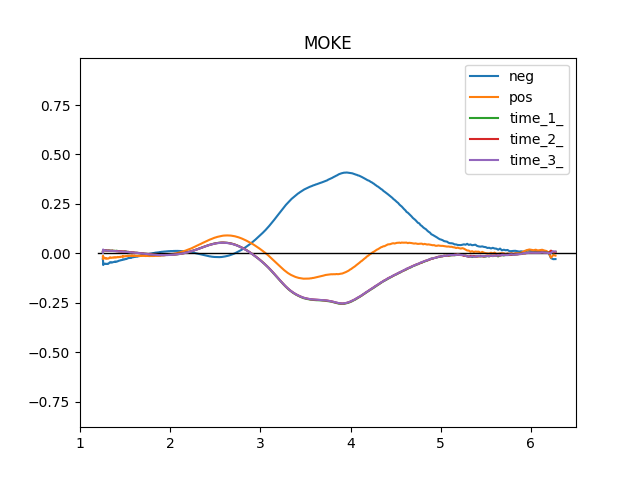

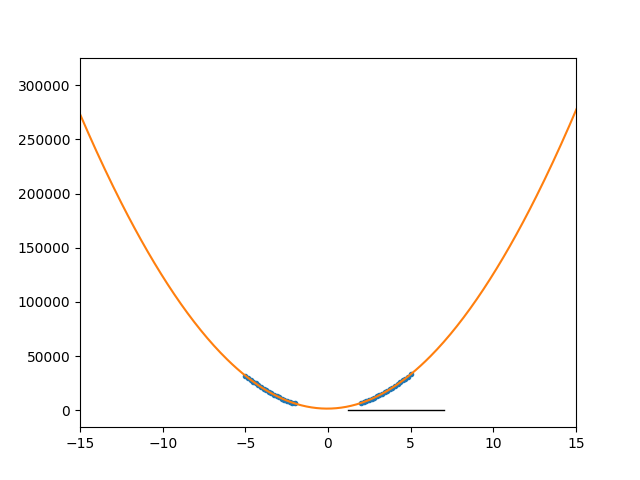

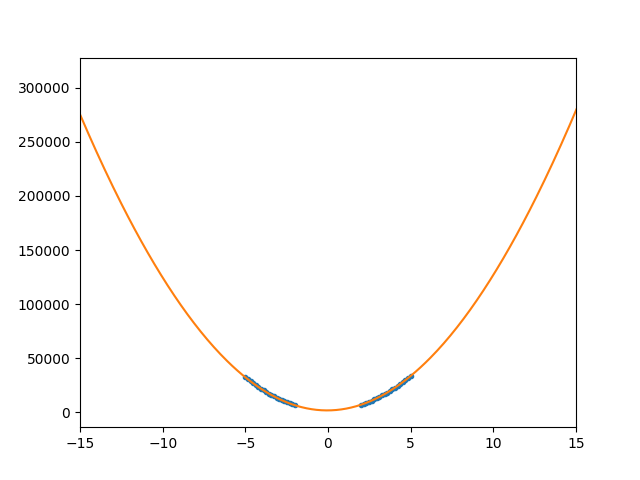

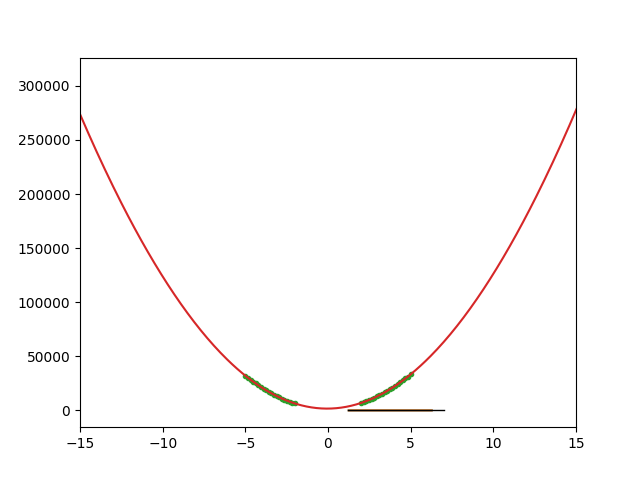

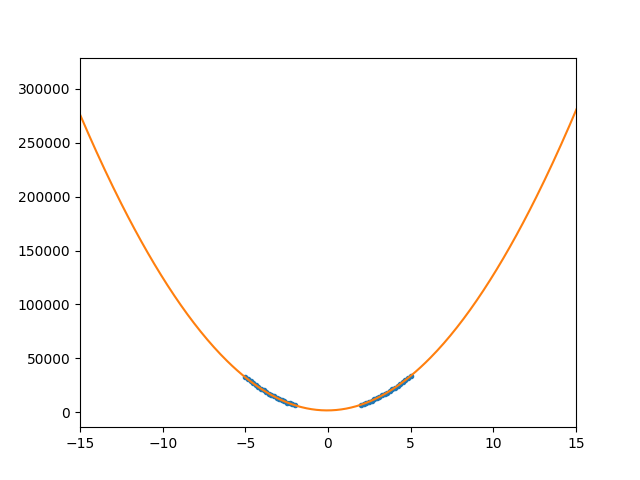

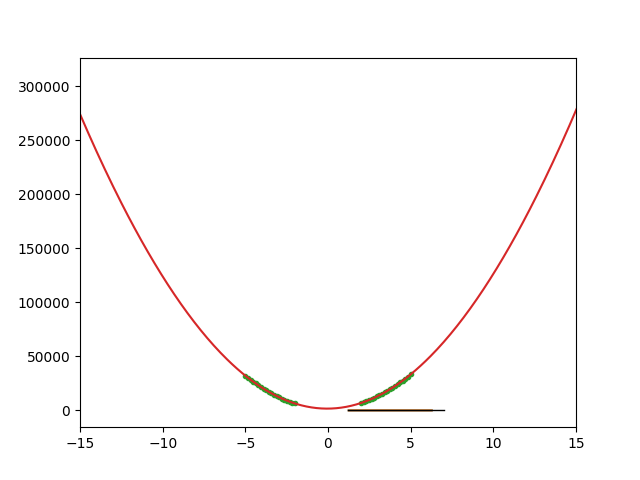

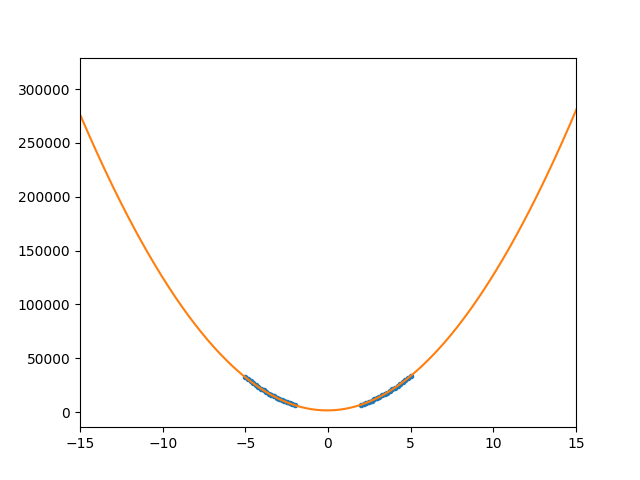

In [1]:
import os
from typing import List
from numpy.lib.function_base import append
import pandas as pd
from scipy.optimize import curve_fit as cf
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget


def fce(x,b,bk,t):       #b[0]=b, b[1]=k*b, b[2]=temny proud
    return b*np.power(np.sin(x),2)+bk*np.sin(2*x)+t

def Fit(names,uhly,path):
    resultados = []
    for name in names:
        directory = [f for f in os.listdir(path) if name in f and 'fieldx_-' in f]
        directoryry = [f for f in os.listdir(path) if name in f and 'fieldx_-' not in f]
        # print(directory)
        for director, directoryr, i in zip(directory,directoryry,list(range(0,len(directory)))):
            if i == 0:
                datap = pd.read_csv(path + director, skiprows=12, index_col=0, sep='\t', header=None)
                datan = pd.read_csv(path + directoryr, skiprows=12, index_col=0, sep='\t', header=None)
            else:
                rawp = pd.read_csv(path + director, skiprows=12, index_col=0, sep='\t', header=None)
                rawn = pd.read_csv(path + directoryr, skiprows=12, index_col=0, sep='\t', header=None)
                datap = pd.concat([datap, rawp], axis=1)
                datan = pd.concat([datan, rawn], axis=1)
        rawp = datap
        rawn = datan
        kerr = []
        err = []
        kerrn = []
        kerrp = []
        i=0
        for ind, row in rawp.iterrows():
            x = uhly
            y = np.array(row.values.astype(float))
            kerrinka,perrinka = cf(fce,np.deg2rad(x),y)
            if 1240/ind > 2.9 and 1240/ind < 2.91:
              plt.plot(x,y,'.', label = path)
              plt.plot(np.arange(-16,16,0.1),fce(np.deg2rad(np.arange(-16,16,0.1)),kerrinka[0],kerrinka[1],kerrinka[2]))
              plt.xlim(-15,15)
              plt.figure()
            err.append(np.sqrt(np.diag(perrinka)))
            kerr.append(kerrinka[1]/kerrinka[0])
            kerrp.append(kerrinka[1]/kerrinka[0])
        for ind, row in rawn.iterrows():
            x = uhly
            y = np.array(row.values.astype(float))
            kerrinka,perrinka = cf(fce,np.deg2rad(x),y)
            err[i]= np.sqrt(np.power(err[i],2) + np.power(np.sqrt(np.diag(perrinka)),2))
            kerr[i] = np.rad2deg((kerr[i]-kerrinka[1]/kerrinka[0])/2)
            kerrn.append(kerrinka[1]/kerrinka[0])
            i += 1

        plt.plot(1240/rawp.index,np.rad2deg(kerrn),label='neg')
        plt.plot(1240/rawp.index,np.rad2deg(kerrp),label='pos')
        # zapis = pd.DataFrame({'MOKE' : np.rad2deg(kerrn)},index = 1240/rawp.index)
        # zapis.to_csv(path + names[0][:-1] + '_kerrrot_pos.dat')
        # zapis = pd.DataFrame({'MOKE' : np.rad2deg(kerrp)},index = 1240/rawp.index)
        # zapis.to_csv(path + names[0][:-1] + '_kerrrot_neg.dat')
    #    plt.figure()
        plt.plot([1.2,7],[0,0],'k-', linewidth = 1)

        resultados.append([kerr,rawp.index.astype(float),err])
        # dataa = pd.read_csv('Python\\Plotit\\LSMO_STO_Kerr_2021.dat', index_col = 0)
        # plt.plot(dataa['MOKE'], label = 'Measurment 2021')
        # d = pd.DataFrame({'MOKEE' : resultados[0][0]},index = 1240/resultados[0][1])
        # rozdil = pd.concat([dataa,d])
        # rozdil = rozdil.sort_index()
        # rozdil = rozdil.interpolate(method = 'index')
        # print(rozdil)
        # plt.plot(rozdil['MOKE'].subtract(rozdil['MOKEE']))
    off = 0
    for k in range(len(resultados)):
        plt.plot(1240/resultados[k][1],[i-off for i in resultados[k][0]], label = names[k])
        plt.title('MOKE')
        # plt.plot(1240/resultados[k][1],[i-j for i,j in zip(resultados[k][0],lol)], label = 'rozdil')
        zapis = pd.DataFrame({'MOKE' : [i-off for i in resultados[k][0]]},index = 1240/resultados[k][1])
        zapis.to_csv(path + names[k][:-1] + '_kerrrot.dat')



#########################################################################################################################################
#########################################################################################################################################
plt.plot([1.2,7],[0,0],'k-', linewidth = 1)



castispek = []
for i in range(1,4):
    castispek = castispek + ['time_' + str(i) + '_']


z = 5
p = 20
k = 2
uhl = [z - (z-k)/(p-1)*i for i in range (p)] + [-k - (z-k)/(p-1)*i for i in range (p)]
# uhl = [z - (z-k)/(p-1)*i for i in range (p)]

cestou = r'C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\MOKE\\PLD3970\\2023\\spectra zrc\\' 
Fit(castispek,uhl,cestou)








plt.legend()
plt.ylim(-0.88,0.99)
plt.xlim(1,6.5)
plt.show()

---
## **Program na potění již vyhodnocených MOKE spekter.**

C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2022/MOKE/PLD4150/5xdesky/LSMO-PLD4150-rot+desky_Time_1.0.dat
C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2022/MOKE/PLD4150/5xdesky/LSMO-PLD4150-rot+desky_Time_2.0.dat
C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2022/MOKE/PLD4150/5xdesky/LSMO-PLD4150-rot+desky_Time_3.0.dat
C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2022/MOKE/PLD4150/5xdesky/LSMO-PLD4150-rot+desky_Time_4.0.dat
C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2022/MOKE/PLD4150/5xdesky/LSMO-PLD4150-rot+desky_Time_5.0.dat


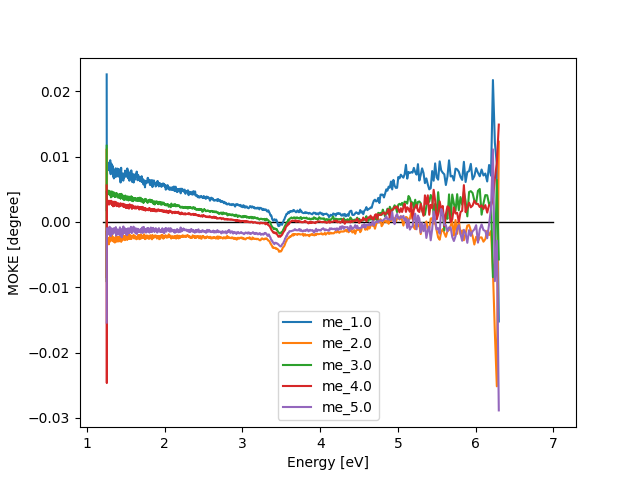

In [24]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
from scipy.optimize import curve_fit as cf
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget


plt.plot([1.2,7],[0,0],'k-', linewidth = 1)
for i in range (1,4):
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    filename = filedialog.askopenfilename(title = "Select file",filetypes = (("txt files","*.dat .txt .KNT"),("all files","*.*")),multiple=True)
    root.destroy()
    for filee in filename:
        data = pd.read_csv(filee,comment='#', index_col=0)
        plt.plot(data['MOKE'], label = filee[-10:-4])
        print(filee)



# sto = pd.read_csv(r'C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\MOKE\\PLD3967\\PLD3967_Kerrrot_15_03_2022.dat', index_col=0)
# plt.plot(sto,'k--',label = 'Reference')
# rozdil = pd.concat([data,sto])
# rozdil = rozdil.sort_index()
# rozdil = rozdil.interpolate(method = 'index')
# plt.plot(rozdil['MOKE'].subtract(rozdil['MOKEE']), label = 'Rozdil')



# plt.title('PLD3978')
plt.ylabel('MOKE [degree]')
plt.xlabel('Energy [eV]')
plt.legend()
# plt.ylim(-0.1,0.2)
plt.show()

---
## **Program na prumerovani spekter**

('C:/Users/tmale/OneDrive/Documents/Data/MnTe/Tepla dira/Trojuhelnicek/-4 T/time_1_kerrrot.dat', 'C:/Users/tmale/OneDrive/Documents/Data/MnTe/Tepla dira/Trojuhelnicek/-4 T/time_2_kerrrot.dat', 'C:/Users/tmale/OneDrive/Documents/Data/MnTe/Tepla dira/Trojuhelnicek/-4 T/time_3_kerrrot.dat', 'C:/Users/tmale/OneDrive/Documents/Data/MnTe/Tepla dira/Trojuhelnicek/-4 T/time_4_kerrrot.dat', 'C:/Users/tmale/OneDrive/Documents/Data/MnTe/Tepla dira/Trojuhelnicek/-4 T/time_5_kerrrot.dat')



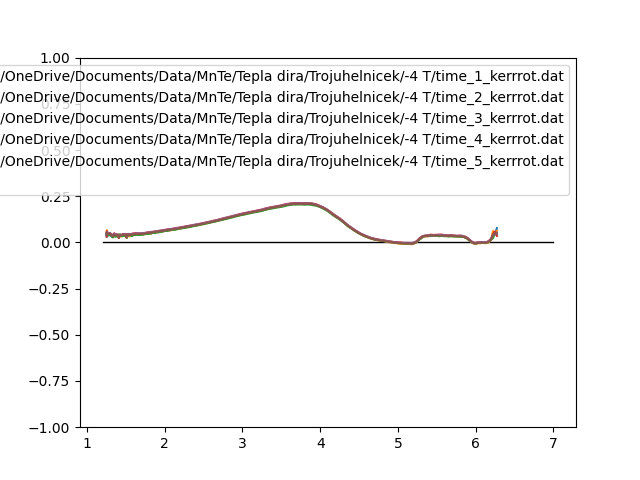

In [10]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
from scipy.optimize import curve_fit as cf
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget


plt.plot([1.2,7],[0,0],'k-', linewidth = 1)
data = pd.DataFrame()
for i in range (1,3):
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\Montana\\Test_montana_12_2022\\",title = "Select file",filetypes = (("txt files","*.dat .txt .KNT"),("all files","*.*")),multiple=True)
    print(filename)
    root.destroy()
    try:
        for filee in filename:
            data2 = pd.read_csv(filee, index_col=0)
            plt.plot(data2,label = filee)
            data = pd.concat([data, data2])
    except:
        print('lol no')
                
by_row_index = data.groupby(data.index)
data = by_row_index.mean()
plt.plot(data, label = 'mean')
# data.to_csv(r'C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\Montana\\PLD3969\\spectra 330K desky\\PLD3969_330K_Kerrdesky_08_04_2022.dat') # NAME!!!! PLD3977_Kerrrot_04_01_2022.dat   PLD3977_Kerrdesky_04_01_2022.dat PLD3969_Kerrrot_290K_02_04_2022.dat
data.to_csv(r'C:\\Users\\tmale\\OneDrive\\Documents\\Data\\MnTe\\Tepla dira\\Trojuhelnicek\\xxx\\xxx.dat')

# lsat = pd.read_csv(r'C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\test_montana\\LSAT.txt', sep='\t', index_col=0)
# plt.plot(lsat.index,-1*lsat['293K'])


plt.legend()
plt.ylim(-1,1)
plt.show()

    

---
## **Savitzky-Golay**

('C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2021/MOKE/PLD4050/PLD4050_Kerrelip_04_07_2022.dat',)


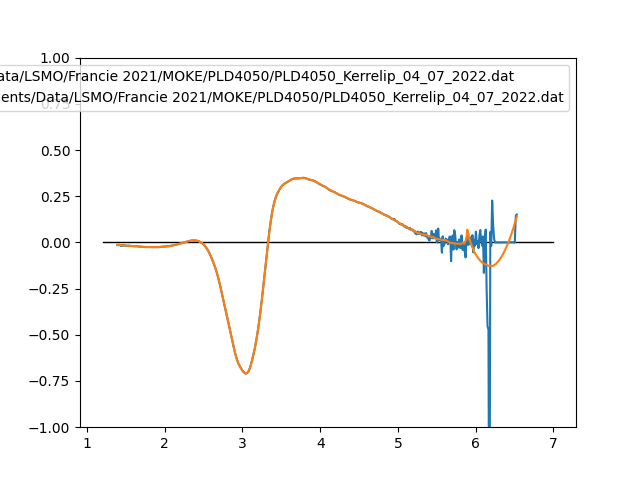

In [25]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
from scipy.optimize import curve_fit as cf
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.signal as ss
%matplotlib widget


plt.plot([1.2,7],[0,0],'k-', linewidth = 1)
for i in range (1,2):
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\MOKE",title = "Select file",filetypes = (("txt files","*.dat .txt .KNT"),("all files","*.*")),multiple=True)
    print(filename)
    root.destroy()
    try:
        for filee in filename:
            data = pd.read_csv(filee, index_col=0)
            plt.plot(data,label = filee[20:])
            data['MOKE'] = ss.savgol_filter(data['MOKE'],51,2)
            plt.plot(data,label = 'savgol ' + filee[20:])
            data.to_csv(filee[:-4] + '_savgol.dat')
    except:
        print('lol no')



plt.legend()
plt.ylim(-1,1)
plt.show()

---
## **Program na spocteni elipticity. Vyber rotacni soubor a elipticky soubor a ono to dopocita. Rotacni soubor musi mit alfabeticky víš jméno než eliptický.**

('C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2021/MOKE/PLD4050/PLD4050_Kerrrot_04_07_2022.dat', 'C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2021/MOKE/PLD4050/PLD4050_Kerrdesky_04_07_2022.dat')


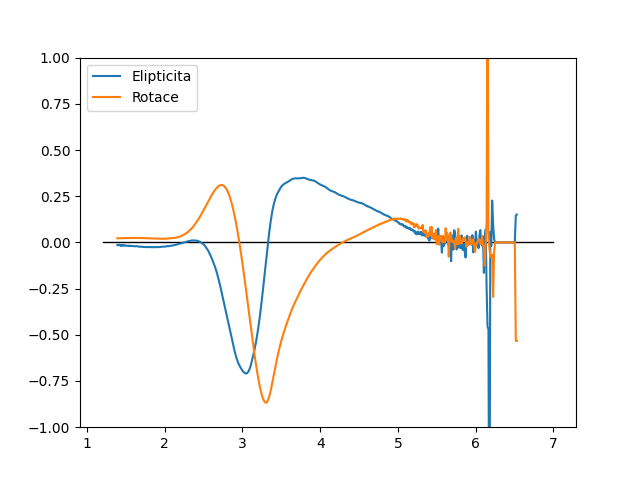

In [23]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import os
%matplotlib widget


plt.plot([1.2,7],[0,0],'k-', linewidth = 1)
def elipticity(rot,waveplates):
    rot_data = pd.read_csv(rot, index_col = 0)
    rot_data = rot_data.sort_index()
    waveplates_data = pd.read_csv(waveplates, index_col = 0)
    waveplates_data = waveplates_data.sort_index()
    energy = np.array(rot_data.index.astype(float))
    lmbda = 1240/energy
    K = np.power(lmbda,2)
    W = 1- 93.0665**2/K
    Q = 1/(np.power(W,2) * lmbda * np.sqrt(1+136.24/W))
    delta = (Q * 1.69508759865 * 100000 + 2.884488929) * np.pi/180
    elip = - (np.array(waveplates_data['MOKE']) - np.array(rot_data['MOKE'])*np.cos(delta))/np.sin(delta)
    elipticita = pd.DataFrame(elip,index = energy, columns = ['MOKE'])
#    elipticita.to_csv(r'C:\\Users\\tmale\\OneDrive\Documents\Data\\LSMO\\Francie 2021\\Montana\\PLD3969\\spectra nowindow desky 2\\PLD3969_300K_Kerrelip_06_04_2022.dat')  # NAME !!!!   PLD3977_Kerrelip_04_01_2022.dat
    elipticita.to_csv(r'C:\\Users\\tmale\\OneDrive\Documents\Data\\LSMO\\Francie 2021\\MOKE\\PLDxxxx\\PLD4050_Kerrelip_04_07_2022.dat')
    plt.plot(elipticita['MOKE'], label = 'Elipticita')          # Debilku tenhle sobour musi znova nafitovat
    plt.plot(rot_data['MOKE'], label = 'Rotace')




root = Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\MOKE\\",title = "Select file",filetypes = (("txt files","*.dat .txt .KNT"),("all files","*.*")),multiple=True)
print(filename)
root.destroy()

elipticity(filename[0],filename[1])



# BACHA PRVNÍ SOUBOT MUSÍ BÝT ROTACE A DRUHÝ DESKY!

plt.ylim(-1,1)
plt.legend()
plt.show()

---
## **View random Tim spektra**

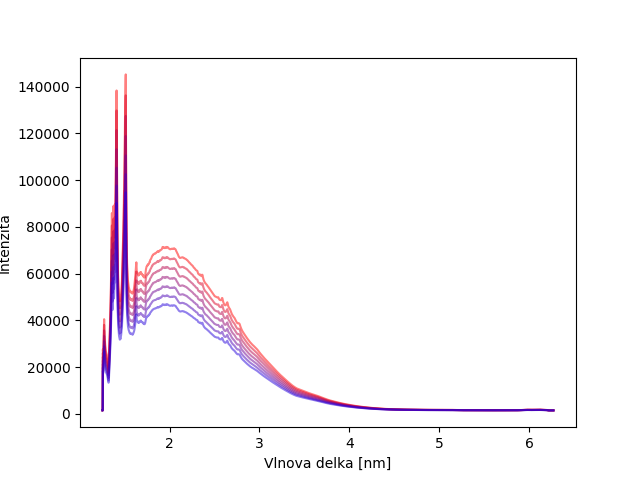

In [9]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget


# plt.plot([1.2,7],[0,0],'k-', linewidth = 1)
filename  = []
for i in range (1,2):
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    filename = filename + list(filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\MOKE\\PLD3967\\Test new spectrometer",title = "Select file",filetypes = (("txt files","*.dat .txt .KNT"),("all files","*.*")),multiple=True))
    # print(filename)
    root.destroy()

avg = []
filename = filename[::]
for i,filee in zip(range(0,len(filename)),filename):
    data = pd.read_csv(filee, skiprows=12, index_col=0, sep='\t', header=None, names = ['1'])
    if i == 0:
       new = data
    plt.plot(1240/data.index,data,label = filee, alpha = 0.5, color= (1-i/len(filename),0,i/len(filename)))
    # avgdata = data[data.index > 250]
    # avg.append(list(data.mean(axis = 0)))

# plt.plot(1240/new.index,new['1'].sub(data['1']), label = 'Rozdil')
# plt.plot(1240/data.index,40000*new['1'].div(data['1']))


# plt.figure()
# plt.plot(avg)
# plt.title('Chlazeni z 100K na 80K')
plt.ylabel('Intenzita')
plt.xlabel('Vlnova delka [nm]')





# plt.ylim(-100,200000)
# plt.legend()
plt.show()


---
## **Fitting smycky**

[1.0, 0.98, 0.96, 0.94, 0.92, 0.9, 0.88, 0.86, 0.84, 0.8200000000000001, 0.8, 0.78, 0.76, 0.74, 0.72, 0.7, 0.6799999999999999, 0.6599999999999999, 0.64, 0.62, 0.6, 0.5800000000000001, 0.56, 0.54, 0.52, 0.5, 0.48, 0.45999999999999996, 0.43999999999999995, 0.42000000000000004, 0.4, 0.38, 0.36, 0.33999999999999997, 0.31999999999999995, 0.29999999999999993, 0.28, 0.26, 0.24, 0.21999999999999997, 0.19999999999999996, 0.17999999999999994, 0.16000000000000003, 0.14, 0.12, 0.09999999999999998, 0.07999999999999996, 0.05999999999999994, 0.040000000000000036, 0.020000000000000018, 0.0, -0.020000000000000018, -0.040000000000000036, -0.06000000000000005, -0.08000000000000007, -0.10000000000000009, -0.1200000000000001, -0.14000000000000012, -0.15999999999999992, -0.17999999999999994, -0.19999999999999996, -0.21999999999999997, -0.24, -0.26, -0.28, -0.30000000000000004, -0.32000000000000006, -0.3400000000000001, -0.3600000000000001, -0.3800000000000001, -0.40000000000000013, -0.41999999999999993, -0.

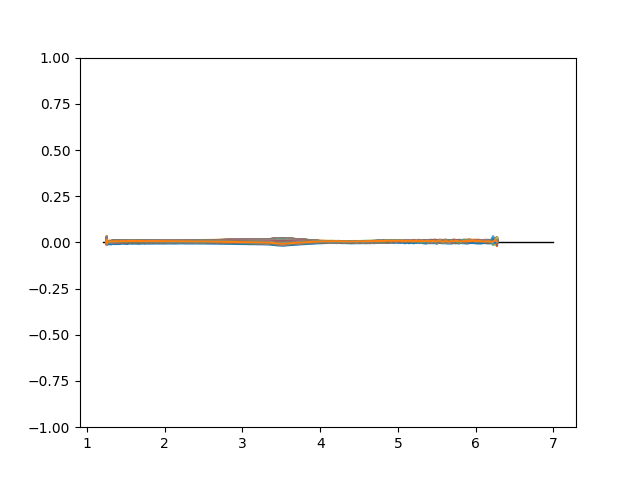

In [12]:
import os
from typing import List
from numpy.lib.function_base import append
import pandas as pd
from scipy.optimize import curve_fit as cf
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget




def fce(x,b,bk,t):       #b[0]=b, b[1]=k*b, b[2]=temny proud
    return b*np.power(np.sin(x),2)+bk*np.sin(2*x)+t

def Fit(name,uhly,path,pole):
    resultados = []
    directories = [f for f in os.listdir(path) if name in f]
    directories.sort()
    pocet = int(len(directories)/len(uhly))
    print(len(directories)/len(uhly))
    for k in range(0,pocet):
        for director, i in zip(directories[int(k*len(uhly)):int((k+1)*len(uhly))],list(range(0,len(uhly)))):
            if i == 0:
                datap = pd.read_csv(path + director, skiprows=12, index_col=0, sep='\t', header=None)
            else:
                rawp = pd.read_csv(path + director, skiprows=12, index_col=0, sep='\t', header=None)
                datap = pd.concat([datap, rawp], axis=1)
        rawp = datap
        kerr = []
        err = []
        for ind, row in rawp.iterrows():
            x = uhly
            y = np.array(row.values.astype(float))
            kerrinka,perrinka = cf(fce,np.deg2rad(x),y)
            # if 1240/ind > 4.55 and 1240/ind < 4.57:
            #     plt.plot(x,y,'.', label = path)
            #     plt.plot(np.arange(-16,16,0.1),fce(np.deg2rad(np.arange(-16,16,0.1)),kerrinka[0],kerrinka[1],kerrinka[2]))
            #     plt.xlim(-7,7)
            #     plt.figure()
            err.append(np.rad2deg(np.sqrt(np.diag(perrinka))))
            kerr.append(np.rad2deg(kerrinka[1]/kerrinka[0]))

        resultados.append([kerr,rawp.index.astype(float),err])

    off = 0
    plt.plot(1240/resultados[0][1],[i-off for i in resultados[0][0]], label = pole[k])
    smycka = pd.DataFrame({'MOKE ' + str(pole[0]) + 'T down' : [i-off for i in resultados[0][0]]},index = 1240/resultados[0][1])
    for k in range(1,int(len(resultados)/2)):
        plt.plot(1240/resultados[k][1],[i-off for i in resultados[k][0]], label = pole[k])
        zapis = pd.DataFrame({'MOKE ' + str(pole[k]) + 'T down' : [i-off for i in resultados[k][0]]},index = 1240/resultados[k][1])
        smycka = pd.concat([smycka, zapis], axis=1)
    for k in range(int(len(resultados)/2), len(resultados)):
        plt.plot(1240/resultados[k][1],[i-off for i in resultados[k][0]], label = pole[k])
        zapis = pd.DataFrame({'MOKE ' + str(pole[k]) + 'T up' : [i-off for i in resultados[k][0]]},index = 1240/resultados[k][1])
        smycka = pd.concat([smycka, zapis], axis=1)
    smycka.to_csv(path + 'smycka.dat',)



#########################################################################################################################################
#########################################################################################################################################
plt.plot([1.2,7],[0,0],'k-', linewidth = 1)



castispek = 'fieldx'


z = 5
p = 10
k = 2
uhl = [z - (z-k)/(p-1)*i for i in range (p)] + [-k - (z-k)/(p-1)*i for i in range (p)]


z = 1
krok = 0.02   # Zmen!!!!!
k = -1
fields = [z - krok*i for i in range (int((z-k)/krok)+1)] + [k + krok*i for i in range (int((z-k)/krok+1))]
# fields = [round(i,2) for i in fields]
print(fields)
print(len(fields))


cestou = r'C:\Users\tmale\OneDrive\Documents\Data\LSMO\Francie 2022\MOKE\PLD4150\loop\raw_data\spectra\\'
Fit(castispek,uhl,cestou,fields)






# plt.legend()
plt.ylim(-1,1)
plt.show()


---
## **View spektralne smycky**

('C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2022/MOKE/PLD4150/loop/raw_data/PLD4150-loop_smycka.dat',)
              1.0T     0.98T     0.96T     0.94T     0.92T      0.9T  \
eV                                                                     
1.253214 -0.003659 -0.002527  0.001947 -0.000378  0.010802  0.008429   
1.254125  0.009347 -0.008642 -0.011589 -0.014031  0.000621  0.007463   
1.255039 -0.002863  0.018531 -0.006589  0.004249 -0.000920  0.006653   
1.255953 -0.015162 -0.002723  0.004647  0.006845  0.013177  0.004304   
1.256869 -0.011468 -0.004025 -0.004015 -0.002694 -0.002441 -0.000484   
...            ...       ...       ...       ...       ...       ...   
6.196735 -0.005040 -0.000417  0.001182  0.000851  0.003671  0.003928   
6.221497  0.000579  0.006423  0.012086 -0.005307  0.007070  0.009710   
6.246459 -0.005371  0.013492  0.000354 -0.008496  0.006399 -0.001123   
6.271625 -0.010300 -0.019049  0.008319  0.005761  0.001326  0.004620   
6.296997 -0.007062 -0.0

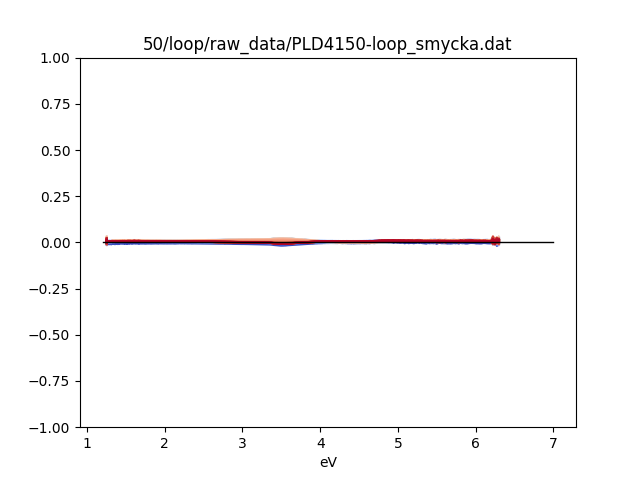

In [26]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
from scipy.optimize import curve_fit as cf
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib widget

root = Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\MnTe\\Tepla dira\\Trojuhelnicek\\",title = "Select file",filetypes = (("txt files","*.dat .txt .KNT"),("all files","*.*")),multiple=True)
print(filename)
root.destroy()
for filee in filename:
    data = pd.read_csv(filee,comment='#', index_col=0)
    data.plot(colormap = 'coolwarm',title = filee[-40:], legend = False)
    plt.plot([1.2,7],[0,0],'k-', linewidth = 1)
    print(data)

# plt.legend()
plt.ylim(-1,1)
plt.show()

---
## **View smycky na konkretnich energiich**

('C:/Users/tmale/OneDrive/Documents/Data/MnTe/Tepla dira/Trojuhelnicek/Smycka/smycka.dat',)


C:\Users\tmale\AppData\Local\Temp\ipykernel_1744\441355573.py:27: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  rowenergie = data.index.get_loc(energie, 'nearest')


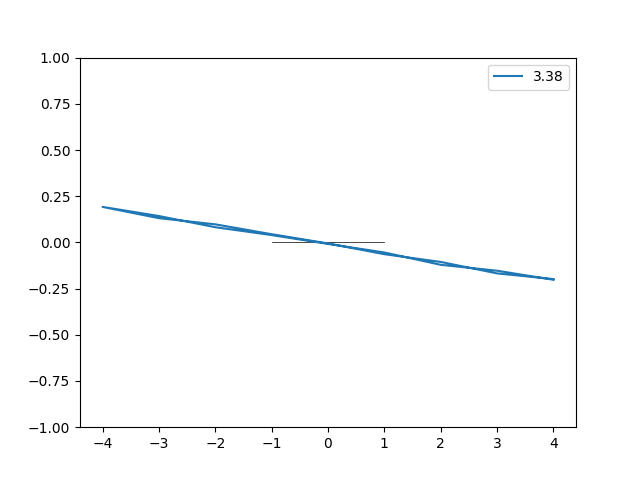

In [14]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
from scipy.optimize import curve_fit as cf
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import math
%matplotlib widget



energies = [3.38]

plt.plot([-4,4],[0,0],'k-', linewidth = 0.5)
root = Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\MnTe\\Tepla dira\\Trojuhelnicek\\",title = "Select file",filetypes = (("txt files","*.dat .txt .KNT"),("all files","*.*")),multiple=True)
print(filename)
root.destroy()
for filee in filename:
    for energie in energies:
        data = pd.read_csv(filee, index_col=0)
        rowenergie = data.index.get_loc(energie, 'nearest')
        pole = list(data.iloc[rowenergie].index)
        pole = [i.split('T')[0] for i in pole]
        pole = [float(i[5:]) for i in pole]
        plt.plot(pole,list(data.iloc[rowenergie]),label = energie)
        # uloz = pd.DataFrame({str(energies[0]) : list(data.iloc[rowenergie])},index = pole)
        # uloz.to_csv(filee[:-4] + '_' + str(energies[0]) + 'eV_slice.dat')



plt.legend()
plt.ylim(-1,1)
plt.show()

---
## **Odecti background smycky**

('C:/Users/tmale/OneDrive/Documents/Data/MnTe/Tepla dira/Trojuhelnicek/Smycka/smycka.dat',)


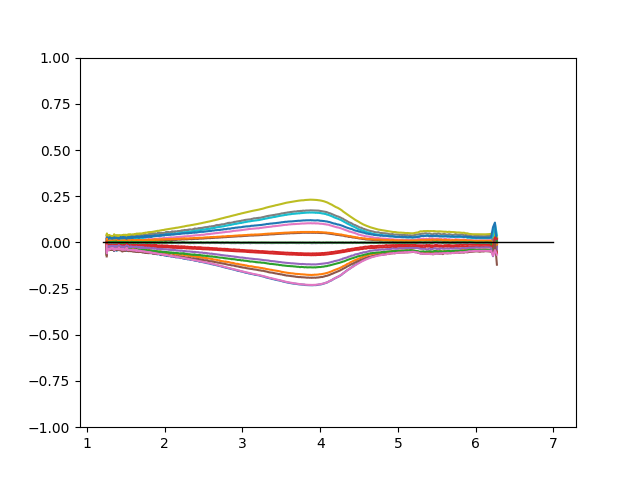

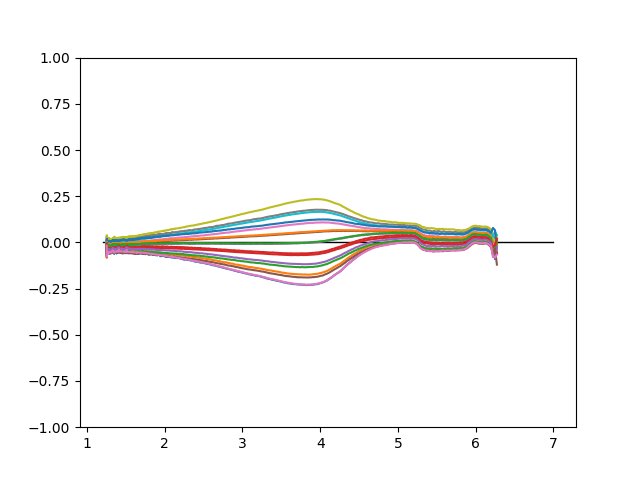

In [19]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget


plt.plot([1.2,7],[0,0],'k-', linewidth = 1)
root = Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\MOKE",title = "Select file",filetypes = (("txt files","*.dat .txt .KNT"),("all files","*.*")),multiple=True)
print(filename)
root.destroy()
for filee in filename:
    data = pd.read_csv(filee, index_col=0)
    plt.plot(data,label = filee)
    plt.ylim(-1,1)
    plt.figure()
    bg = (data['MOKE 4T down'] + data['MOKE 4T up'] + data['MOKE -4T up']*2)/4# + data['MOKE -1.0T up'])/4   ZMEN!!!
    data = data.subtract(bg, axis=0)
        # del data['MOKE 0.52T up']
    plt.plot(data,label = filee)
    data.to_csv(r"C:\\Users\\tmale\\OneDrive\\Documents\\Data\\MnTe\\Tepla dira\\Trojuhelnicek\\xxx\\MnTe_troj_smycka_noBG.dat")    # NAME!!!!
    plt.plot([1.2,7],[0,0],'k-', linewidth = 1)




# plt.legend()
plt.ylim(-1,1)
plt.show()

---
## **Zplacni spektra MOKE k sobe**

C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2021/MOKE/PLD4056/PLD4056_Kerrrot_29_6_2022.dat
C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2021/MOKE/PLD4056/PLD4056_Kerrelip_29_06_2022_savgol.dat


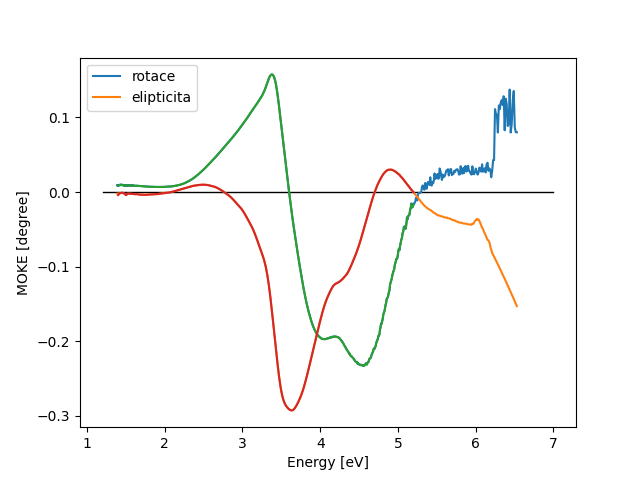

In [28]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget


plt.plot([1.2,7],[0,0],'k-', linewidth = 1)
for i in range (1,3):
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Montana\\PLD3969\\Moke final",title = "Select file",filetypes = (("txt files","*.dat .txt .KNT"),("all files","*.*")),multiple=False)
    print(filename)
    root.destroy()

    if i ==1 :
        data = pd.read_csv(filename, index_col=0)
        plt.plot(data,label = 'rotace')
        data = data.rename(columns={'MOKE':'rot'})
    else:
        read = pd.read_csv(filename, index_col=0)
        plt.plot(read,label = 'elipticita')
        read = read.rename(columns={'MOKE':'elip'})
        data = pd.concat([data,read])

data = data.sort_index()
data = data.interpolate(method = 'index')
data = data[~data.index.duplicated(keep='first')] # drop duplicate indexes
data = data[~data.isin([np.nan]).any(1)]    # drop nan values
vys = pd.DataFrame(index = np.arange(1.4,5.21,0.01))
for colname, col in data.iteritems():
    vys[colname] = np.interp(np.arange(1.4,5.21,0.01),data.index,col)


plt.plot(vys)
vys.to_csv("C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\MOKE\\PLDxxxx\\PLD4056_MOKE_04_07_2022_finalni.dat")

# plt.title('PLD3978')
plt.ylabel('MOKE [degree]')
plt.xlabel('Energy [eV]')
plt.legend()
# plt.ylim(-1,1)
plt.show()